In [16]:
install.packages("pROC")
library(pROC)


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpoVyPiH/downloaded_packages


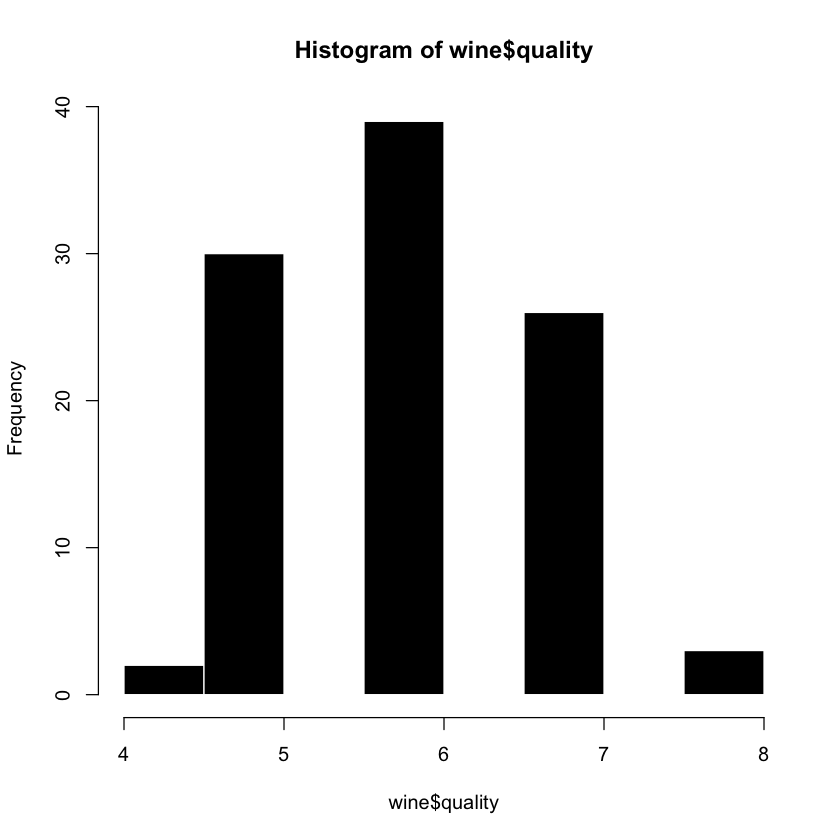

In [2]:
rm(list=ls()) #clears the workspace
#import training dataset
wine = read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/wine.train.csv") 

#plot the target variable
par(bg = "white")  # set background color to white
hist(wine$quality,
     col = "black",
     border = "white")
#not exactly normally distributed but if the variable is discrete and the number of values is larger than 
# 5 or 6 we can still often use least-squares with decent success

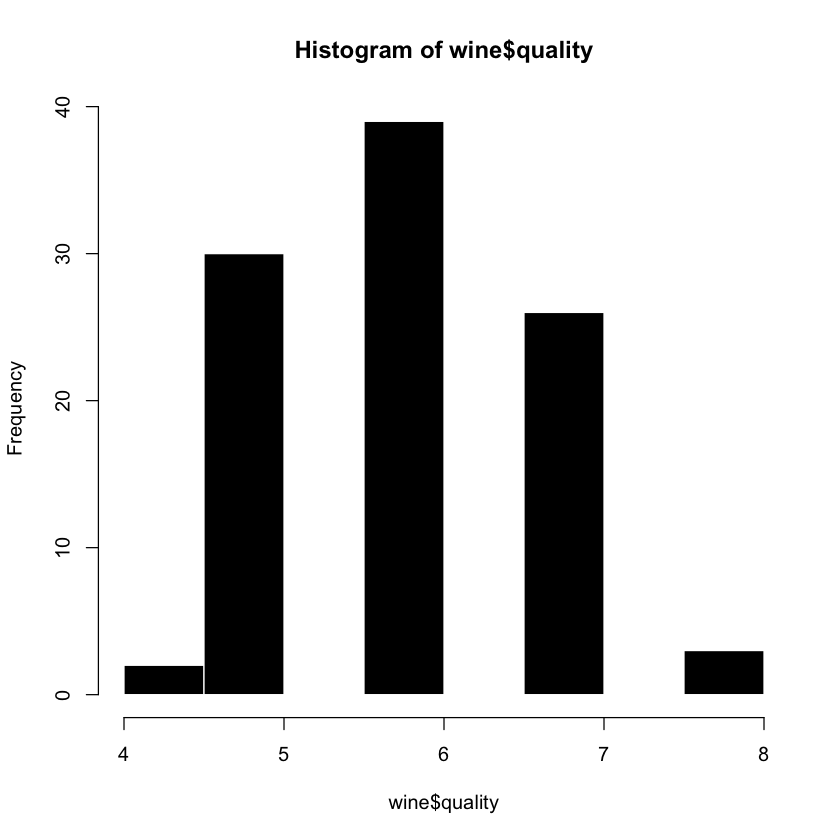

In [ ]:
rm(list=ls()) #clears the workspace
#import training dataset
wine = read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/wine.train.csv") 

#plot the target variable
par(bg = "white")  # set background color to white
hist(wine$quality,
     col = "black",
     border = "white")
#not exactly normally distributed but if the variable is discrete and the number of values is larger than 
# 5 or 6 we can still often use least-squares with decent success

In [4]:
fit <- lm(quality ~ ., wine)
#fits a linear regression to the data and stores it in the var fit
#where quality is the dependent var
#and all other vars are used to predict quality
summary(fit)


Call:
lm(formula = quality ~ ., data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02506 -0.44003  0.00278  0.43634  2.15036 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)           1.904e+02  1.377e+02   1.383   0.1701  
fixed.acidity         1.413e-01  1.555e-01   0.909   0.3660  
volatile.acidity     -1.328e+00  7.564e-01  -1.755   0.0827 .
citric.acid          -6.764e-01  7.878e-01  -0.859   0.3929  
residual.sugar        1.074e-01  5.455e-02   1.969   0.0521 .
chlorides            -3.548e+00  8.601e+00  -0.413   0.6809  
free.sulfur.dioxide   1.115e-02  6.364e-03   1.753   0.0831 .
total.sulfur.dioxide  6.880e-05  2.734e-03   0.025   0.9800  
density              -1.903e+02  1.399e+02  -1.360   0.1771  
pH                    3.495e-01  7.024e-01   0.498   0.6201  
sulphates             2.389e-02  6.855e-01   0.035   0.9723  
alcohol               2.099e-01  1.658e-01   1.266   0.2089  
---
Signif. codes:  0 '***' 0

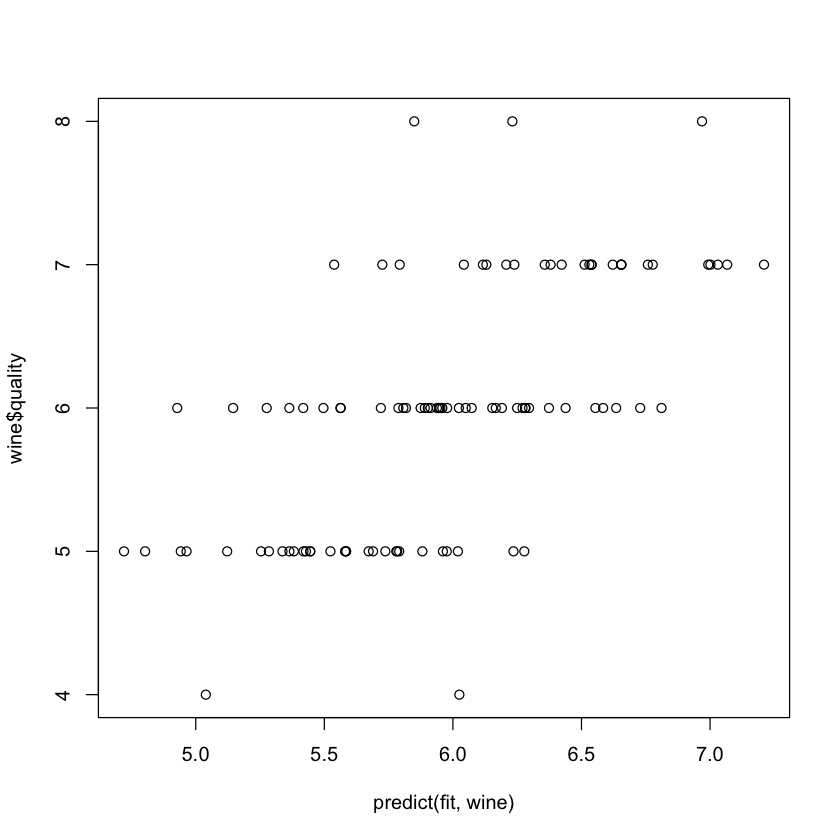

In [7]:
par(bg = "white")  # set background color to white
plot(predict(fit,wine), wine$quality)
#plots the predicted values against the real values for each datapoint
#a perfect regression would have a y=x diagonal line
#this one is kind of ok (generally diagonal trend)

In [8]:
#import testing data
wine.test = read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/wine.test.csv")
#generate predictions for the testing data
#based on the rule from the above regression
#store the predictions in the object yhat_full
yhat_full = predict(fit, wine.test)
#calculate the Mean Squared Error
#(distance between predicted and actual quality scores)
mean((yhat_full - wine.test$quality)^2)
#0 MSE would be a perfect model
#on avg the model is off by sqrt(MSE) in either direction

[1] 0.6193791

In [9]:
fit_aic = step(fit) #stepwise regression to optimse a linear model
#penalised regression using Akaike information criterion
summary(fit_aic)

Start:  AIC=-54.7
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates + alcohol

                       Df Sum of Sq    RSS     AIC
- total.sulfur.dioxide  1   0.00033 45.523 -56.695
- sulphates             1   0.00063 45.523 -56.695
- chlorides             1   0.08804 45.611 -56.503
- pH                    1   0.12805 45.651 -56.415
- citric.acid           1   0.38138 45.904 -55.862
- fixed.acidity         1   0.42716 45.950 -55.762
- alcohol               1   0.82908 46.352 -54.891
<none>                              45.523 -54.696
- density               1   0.95750 46.480 -54.615
- free.sulfur.dioxide   1   1.58899 47.112 -53.265
- volatile.acidity      1   1.59394 47.117 -53.255
- residual.sugar        1   2.00481 47.527 -52.386

Step:  AIC=-56.7
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + density


Call:
lm(formula = quality ~ volatile.acidity + residual.sugar + free.sulfur.dioxide + 
    density + alcohol, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.99401 -0.47107 -0.02954  0.42458  2.20723 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)          1.276e+02  7.533e+01   1.693  0.09369 . 
volatile.acidity    -1.348e+00  7.083e-01  -1.902  0.06017 . 
residual.sugar       8.572e-02  2.951e-02   2.905  0.00458 **
free.sulfur.dioxide  1.151e-02  4.837e-03   2.379  0.01938 * 
density             -1.261e+02  7.490e+01  -1.684  0.09556 . 
alcohol              2.985e-01  1.118e-01   2.671  0.00891 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7024 on 94 degrees of freedom
Multiple R-squared:  0.3894,	Adjusted R-squared:  0.3569 
F-statistic: 11.99 on 5 and 94 DF,  p-value: 5.478e-09


In [10]:
yhat_full_aic = predict(fit_aic, wine.test)
mean((yhat_full_aic - wine.test$quality)^2)
#performs better than the full regression as MSE is smaller

[1] 0.6113354

In [11]:
#shows the rule with coefficients
fit_aic$coefficients

(Intercept)    volatile.acidity      residual.sugar free.sulfur.dioxide 
       127.56087583         -1.34757963          0.08572223          0.01150856 
            density             alcohol 
      -126.10886387          0.29853487

In [12]:
#BIC penalised regression, more conservative than AIC
fit_bic = step(fit, k = log(length(wine$quality)))
# k is the penalty factor which here is log(n)
summary(fit_bic)

Start:  AIC=-23.43
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates + alcohol

                       Df Sum of Sq    RSS     AIC
- total.sulfur.dioxide  1   0.00033 45.523 -28.038
- sulphates             1   0.00063 45.523 -28.038
- chlorides             1   0.08804 45.611 -27.846
- pH                    1   0.12805 45.651 -27.758
- citric.acid           1   0.38138 45.904 -27.205
- fixed.acidity         1   0.42716 45.950 -27.105
- alcohol               1   0.82908 46.352 -26.234
- density               1   0.95750 46.480 -25.958
- free.sulfur.dioxide   1   1.58899 47.112 -24.608
- volatile.acidity      1   1.59394 47.117 -24.598
- residual.sugar        1   2.00481 47.527 -23.729
<none>                              45.523 -23.434

Step:  AIC=-28.04
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + densi


Call:
lm(formula = quality ~ residual.sugar + free.sulfur.dioxide + 
    alcohol, data = wine)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0953 -0.4513 -0.0379  0.3695  2.2617 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.637301   0.760792   0.838  0.40429    
residual.sugar      0.036225   0.014820   2.444  0.01634 *  
free.sulfur.dioxide 0.013400   0.004842   2.767  0.00678 ** 
alcohol             0.435556   0.061433   7.090 2.27e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7173 on 96 degrees of freedom
Multiple R-squared:  0.3497,	Adjusted R-squared:  0.3294 
F-statistic: 17.21 on 3 and 96 DF,  p-value: 5.088e-09


In [13]:
yhat_full_bic = predict(fit_bic, wine.test)
mean((yhat_full_bic - wine.test$quality)^2)
#this MSE is actually worse
#so that means this model was too harsh
#and omitted important predictors

[1] 0.6524636


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpoVyPiH/downloaded_packages


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


